# Inference

### Importing Libraries

In [2]:
import torch
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os

### Loading trained model

In [3]:
model = torch.load('tumor_resnet50.pt' , map_location=torch.device('cpu'))

### Helper function for image processing

In [4]:
def process_image(image):    
    img=PIL.Image.open(image)
    w,h = img.size
    if(w<h):
        new_w = 256
        ratio = float(new_w) / float(w)
        new_h = int(float(h) * float(ratio))
    else:
        new_h = 256
        ratio = float(new_h) / float(h)
        new_w = int(float(w) * float(ratio))
    img = img.resize((new_w , new_h), PIL.Image.ANTIALIAS)
    left = (new_w - 224)/2
    top = (new_h - 224)/2
    right = (new_w + 224)/2
    bottom = (new_h + 224)/2
    img = img.crop((left, top, right, bottom))
    np_image = np.array(img)
    np_image =np_image /255.0
    means = [0.485,0.456,0.406]
    sd = [0.229,0.224,0.225]
    np_image = np_image - means
    np_image = np_image / sd
    np_image_final = np_image.transpose((2,0,1))
    return np_image_final

### Helper function for Model Prediction

In [5]:
def predict(image_path):
    img = process_image(image_path)   
    img = torch.from_numpy(img)
    img.unsqueeze_(0)
    img = img.float()
    with torch.no_grad():
        model.eval()
        logps = model(img)
        ps = torch.exp(logps)
        top_p,top_index = ps.topk(2 , dim=1)        

        
        #top_p=top_p.cpu().numpy()[0]
        top_p=top_p.numpy()[0]
        top_p /= sum(top_p)
          
        #top_index=top_index.cpu().numpy()[0]
        top_index=top_index.numpy()[0]
        
        
        classes = ['benign', 'malignant']
        return classes[top_index[0]], str(round(top_p[0]*100.0,2)) + '%'

#### *Optional: Helper function for Image display

In [6]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title(title)
    
    image = image.transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    return ax

### Inferencing some Malignant images _(test set)_

In [7]:
list_imgs = os.listdir('M')
work_dir = os.getcwd()
path = os.path.join (work_dir,'M')

print("Summary:")
print("_________________________________________________________________")
print ("{:<33}|  {:<16} | {:<15}".format('Image Name','Prediction Label','Confidence'))
for single_image in list_imgs:
    print("---------------------------------+-------------------+-----------")
    pred_label, pred_confidence = predict(os.path.join(path, single_image))
    
    print ("{:<33}|  {:<16} | {:<15}".format(single_image,pred_label,pred_confidence))

Summary:
_________________________________________________________________
Image Name                       |  Prediction Label | Confidence     
---------------------------------+-------------------+-----------
SOB_M_MC-14-10147-100-010.png    |  benign           | 77.97%         
---------------------------------+-------------------+-----------
SOB_M_MC-14-13418DE-40-013.png   |  benign           | 90.68%         
---------------------------------+-------------------+-----------
SOB_M_MC-14-16456-400-012.png    |  malignant        | 88.31%         
---------------------------------+-------------------+-----------
SOB_M_MC-14-18842D-40-013.png    |  malignant        | 86.36%         
---------------------------------+-------------------+-----------
SOB_M_MC-14-19979-200-001.png    |  malignant        | 99.95%         
---------------------------------+-------------------+-----------
SOB_M_MC-14-19979C-200-004.png   |  malignant        | 96.08%         
--------------------------------

### Plotting Malignant images with prediction

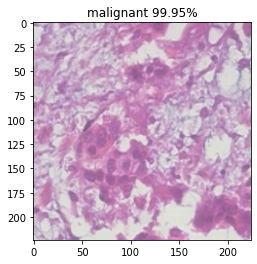

In [8]:
image_path = os.path.join(path,list_imgs[4])
img = process_image(image_path)
predic,prob_cent = predict(image_path)
ax = imshow(img,  title=predic + ' '+prob_cent)  
plt.show()
#uncomment the following lines of code to plot all the Malignant images available  
## select all the following lines and hit   ctrl + /

# for image in list_imgs:
#     image_path = os.path.join(path,image)
#     img = process_image(image_path)
#     predic,prob_cent = predict(image_path)
#     ax = imshow(img,  title=predic + ' '+prob_cent)  
#     plt.show()

### Inferencing some Benign images _(test set)_

In [9]:
list_imgs = os.listdir('B')
work_dir = os.getcwd()
path = os.path.join (work_dir,'B')

print("Summary:")
print("_________________________________________________________________")
print ("{:<33}|  {:<16} | {:<15}".format('Image Name','Prediction Label','Confidence'))
for single_image in list_imgs:
    print("---------------------------------+-------------------+-----------")
    pred_label, pred_confidence = predict(os.path.join(path, single_image))
    
    print ("{:<33}|  {:<16} | {:<15}".format(single_image,pred_label,pred_confidence))

Summary:
_________________________________________________________________
Image Name                       |  Prediction Label | Confidence     
---------------------------------+-------------------+-----------
SOB_B_F-14-23060CD-400-006.png   |  benign           | 99.66%         
---------------------------------+-------------------+-----------
SOB_B_F-14-23222AB-40-013.png    |  benign           | 99.85%         
---------------------------------+-------------------+-----------
SOB_B_F-14-29960AB-400-011.png   |  malignant        | 77.77%         
---------------------------------+-------------------+-----------
SOB_B_F-14-9133-200-004.png      |  benign           | 82.64%         
---------------------------------+-------------------+-----------
SOB_B_PT-14-21998AB-100-058.png  |  benign           | 53.92%         
---------------------------------+-------------------+-----------
SOB_B_PT-14-21998AB-200-008.png  |  benign           | 74.75%         
--------------------------------

### Plotting Benign images with prediction

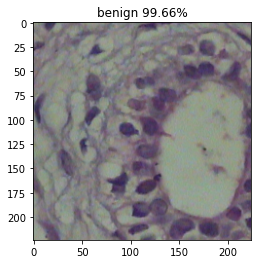

In [10]:
image_path = os.path.join(path,list_imgs[0])
img = process_image(image_path)
predic,prob_cent = predict(image_path)
ax = imshow(img,  title=predic + ' '+prob_cent)  
plt.show()

#uncomment the following lines of code to plot all the Benign images available  
## select all the following lines and hit   ctrl + /

# for image in list_imgs:
#     image_path = os.path.join(path,image)
#     img = process_image(image_path)
#     predic,prob_cent = predict(image_path)
#     ax = imshow(img,  title=predic + ' '+prob_cent)  
#     plt.show()